In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("heart.csv")

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Dta Preprocessing

In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [14]:
df['Sex'] = df['Sex'].map({'M':0 , "F" : 1})
df['ChestPainType'] = df['ChestPainType'].map({'ATA':0 , "NAP" : 1, 'ASY':2  ,"TA":3})
df['RestingECG'] = df['RestingECG'].map({'Normal':0 , "ST" : 1, 'LVH':2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0 , "Y" : 1})
df['ST_Slope'] = df['ST_Slope'].map({'Up':0 , "Flat" : 1, 'Down':2})

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [22]:
df['Cholesterol'].replace(0,np.nan,inplace=True)
df['RestingBP'].replace(0,np.nan,inplace=True)

In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
after_imputing = imputer.fit_transform(df) 

In [26]:
df = pd.DataFrame(after_imputing,columns=df.columns)

In [28]:
df['Cholesterol'].isna().sum()

0

In [30]:
df['RestingBP'].unique()

array([140.        , 160.        , 130.        , 138.        ,
       150.        , 120.        , 110.        , 136.        ,
       115.        , 100.        , 124.        , 113.        ,
       125.        , 145.        , 112.        , 132.        ,
       118.        , 170.        , 142.        , 190.        ,
       135.        , 180.        , 108.        , 155.        ,
       128.        , 106.        ,  92.        , 200.        ,
       122.        ,  98.        , 105.        , 133.        ,
        95.        ,  80.        , 137.        , 185.        ,
       165.        , 126.        , 152.        , 116.        ,
       126.66666667, 144.        , 154.        , 134.        ,
       104.        , 139.        , 131.        , 141.        ,
       178.        , 146.        , 158.        , 123.        ,
       102.        ,  96.        , 143.        , 172.        ,
       156.        , 114.        , 127.        , 101.        ,
       174.        ,  94.        , 148.        , 117.  

# Data Visualization

<Axes: >

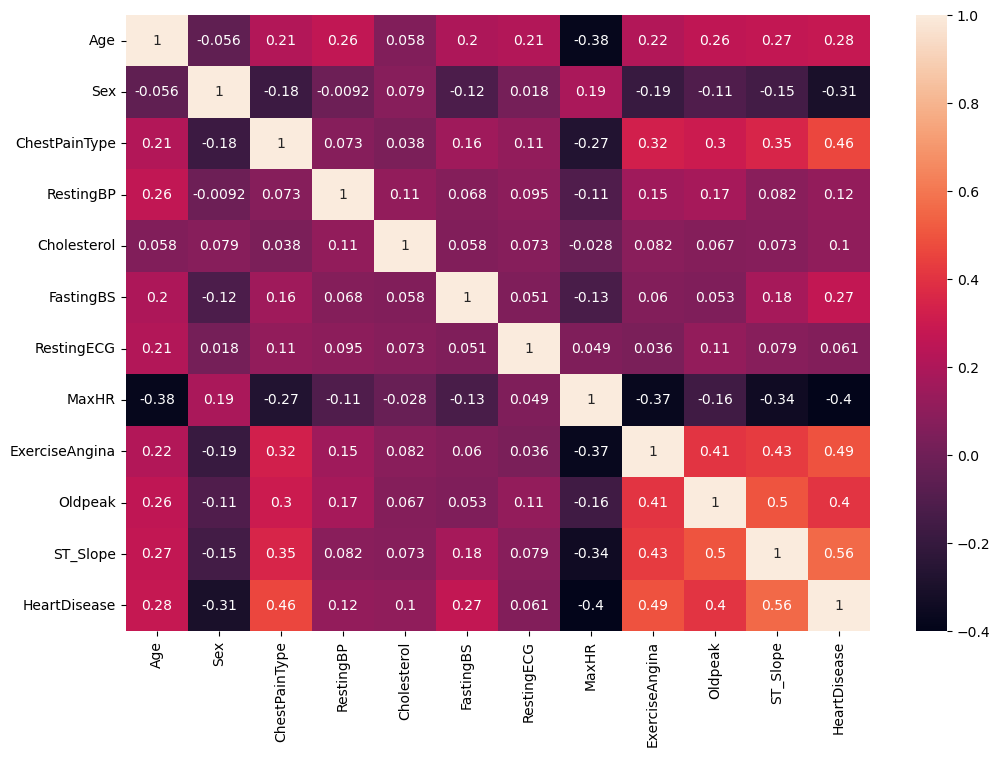

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Sex Vs HeartDisease')

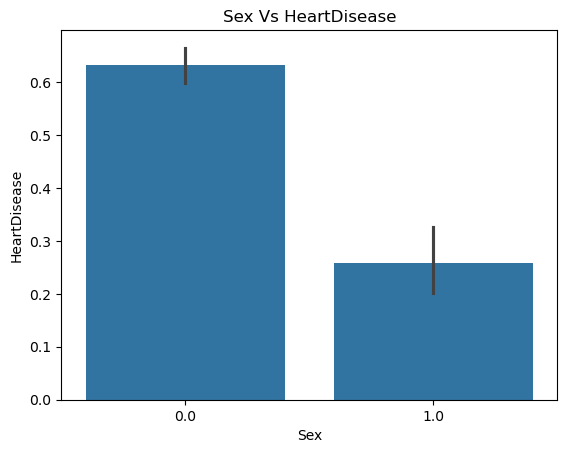

In [34]:
sns.barplot(df,x='Sex',y='HeartDisease')
plt.title("Sex Vs HeartDisease")

Text(0.5, 1.0, 'Heart Disease Distribution')

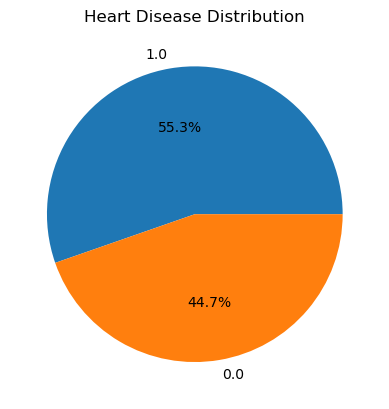

In [37]:
x = df['HeartDisease'].value_counts()
plt.pie(x, labels=x.index, autopct='%1.1f%%')
plt.title('Heart Disease Distribution')

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

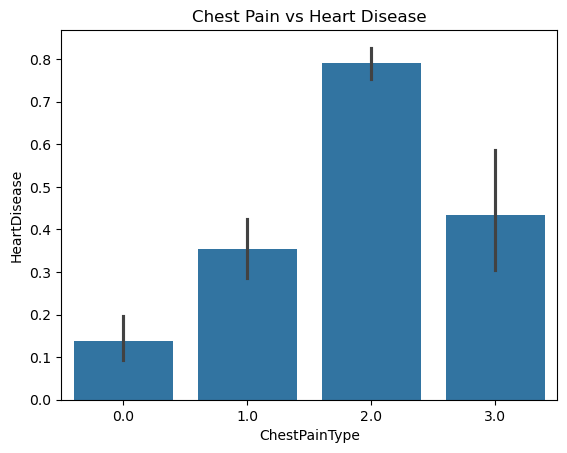

In [39]:
sns.barplot(df , x='ChestPainType' , y = 'HeartDisease')
plt.title("Chest Pain vs Heart Disease")
# 'ATA':0 , "NAP" : 1, 'ASY':2  ,"TA":3

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

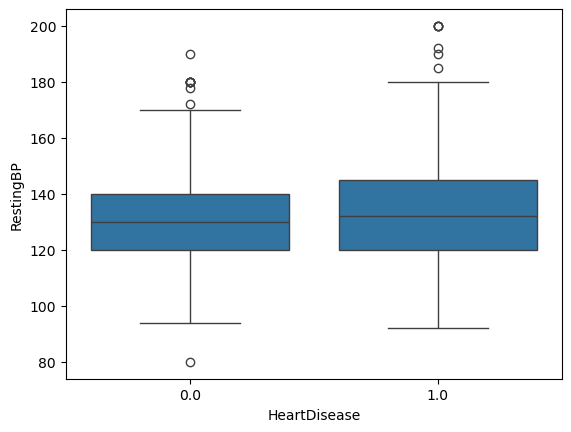

In [41]:
sns.boxplot(data=df,x='HeartDisease',y='RestingBP')

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

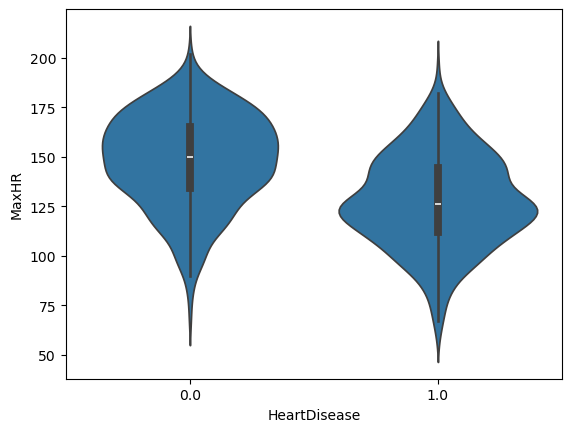

In [43]:
sns.violinplot(data=df,x='HeartDisease',y="MaxHR")

<Axes: xlabel='HeartDisease', ylabel='FastingBS'>

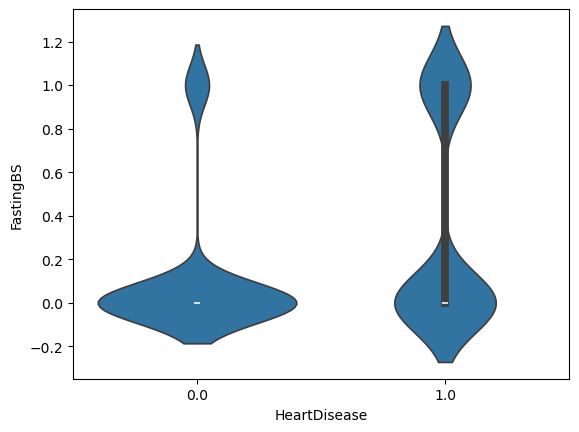

In [45]:
sns.violinplot(data=df,x='HeartDisease',y="FastingBS")

<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

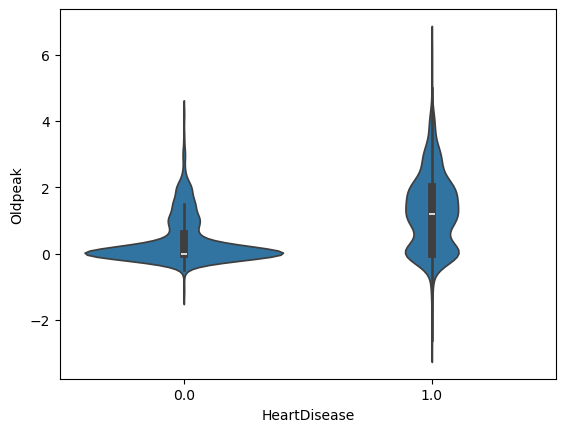

In [47]:
sns.violinplot(data=df,x='HeartDisease',y="Oldpeak")

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

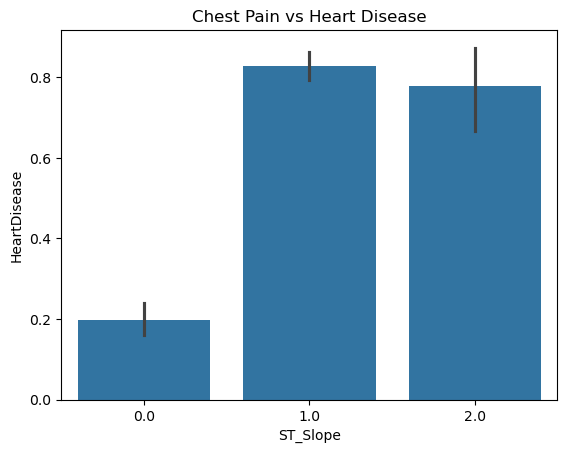

In [49]:
sns.barplot(df , x='ST_Slope' , y = 'HeartDisease')
plt.title("Chest Pain vs Heart Disease")
# ''Up':0 , "Flat" : 1, 'Down':2

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

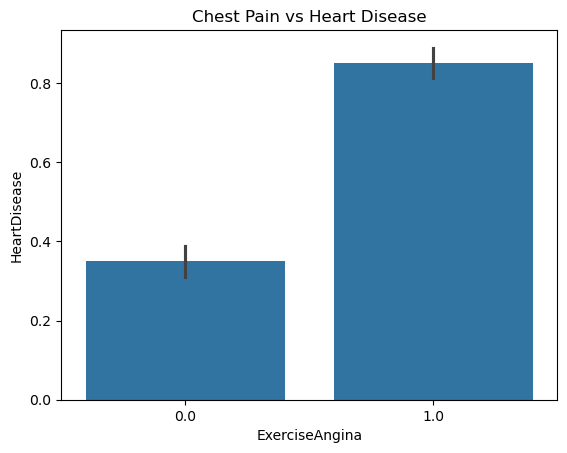

In [51]:
sns.barplot(df , x='ExerciseAngina' , y = 'HeartDisease')
plt.title("Chest Pain vs Heart Disease")
# 'No':0 , "Yes":1

# Model Training

In [54]:
X = df.drop('HeartDisease',axis = 1)
y= df['HeartDisease']

In [56]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=df['HeartDisease'])

In [58]:
models = {
    'lr' : LogisticRegression(),
    'knn' : KNeighborsClassifier(n_neighbors=5),
    'nb' : GaussianNB(),
    'tree' : DecisionTreeClassifier(),
    'svm' : SVC()
}
result = []
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test , y_pred)
    result.append({
        'model' : name,
        'Accuracy' : round(acc,2),
    })

In [60]:
for r in result:
    print(r)

{'model': 'lr', 'Accuracy': 0.86}
{'model': 'knn', 'Accuracy': 0.64}
{'model': 'nb', 'Accuracy': 0.87}
{'model': 'tree', 'Accuracy': 0.82}
{'model': 'svm', 'Accuracy': 0.73}


# Model Tuning

In [63]:
lr = LogisticRegression()
classifier = GridSearchCV(lr,{
    'solver' : ['lbfgs','newton-cholesky','saga'],
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [500, 1000]
}, cv=5,return_train_score=False)

classifier.fit(X_train,y_train)
classifier.cv_results_
results = pd.DataFrame(classifier.cv_results_)
results[["param_solver",'param_C','param_max_iter',"mean_test_score"]]

,param_solver,param_C,param_max_iter,mean_test_score
0,lbfgs,0.01,500,0.806495
1,newton-cholesky,0.01,500,0.806495
2,saga,0.01,500,0.761588
3,lbfgs,0.01,1000,0.806495
4,newton-cholesky,0.01,1000,0.806495
5,saga,0.01,1000,0.776535
6,lbfgs,0.10,500,0.848765
7,newton-cholesky,0.10,500,0.848765
8,saga,0.10,500,0.762948
9,lbfgs,0.10,1000,0.848765


In [64]:
nb = GaussianNB()
classifier = GridSearchCV(nb,{
    'var_smoothing': np.logspace(-12, -6, 7)
}, cv=5,return_train_score=False)

classifier.fit(X_train,y_train)
classifier.cv_results_
results = pd.DataFrame(classifier.cv_results_)
results[["param_var_smoothing","mean_test_score"]]

,param_var_smoothing,mean_test_score
0,1.000000e-12,0.832383
1,1.000000e-11,0.832383
2,1.000000e-10,0.832383
3,1.000000e-09,0.832383
4,1.000000e-08,0.832383
5,1.000000e-07,0.832383
6,1.000000e-06,0.832383


In [67]:
np.logspace(-12, -6, 7)

array([1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06])

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nb = GaussianNB(var_smoothing=1e-6)
nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))


0.8695652173913043


In [71]:
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=None,       # let trees grow fully
    random_state=42,
)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.875


In [73]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train,y_train)
y_pred = ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8478260869565217


In [75]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train,y_train)
y_pred = gb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8641304347826086


In [77]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8532608695652174


In [79]:
classifier = RandomizedSearchCV(xgb_model,{
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'reg_lambda': [1, 1.5, 2],
    'eval_metric':['mlogloss'],
    'use_label_encoder': [False],
}, cv=7,return_train_score=False,n_iter=50)
classifier.fit(X_train, y_train)
results = pd.DataFrame(classifier.cv_results_)
scores = results[
["param_n_estimators",
 "param_max_depth",
 "param_learning_rate",
 "param_subsample",
 "param_colsample_bytree",
 "param_reg_lambda",
 "param_eval_metric",
 'param_use_label_encoder',
 "mean_test_score"]]
scores.sort_values(by='mean_test_score', ascending=False)


,param_n_estimators,param_max_depth,param_learning_rate,param_subsample,param_colsample_bytree,param_reg_lambda,param_eval_metric,param_use_label_encoder,mean_test_score
40,300,6,0.10,0.7,0.6,2.0,mlogloss,False,0.860963
19,100,6,0.01,0.8,0.6,1.0,mlogloss,False,0.858242
41,200,5,0.20,1.0,0.7,1.0,mlogloss,False,0.858229
29,100,6,0.10,0.6,0.6,1.0,mlogloss,False,0.858229
0,100,3,0.05,1.0,0.7,1.5,mlogloss,False,0.858216
35,200,5,0.05,1.0,1.0,2.0,mlogloss,False,0.858203
20,500,8,0.01,0.6,0.8,1.5,mlogloss,False,0.856868
6,300,3,0.05,0.6,0.7,1.0,mlogloss,False,0.856816
49,100,6,0.01,1.0,0.8,1.5,mlogloss,False,0.855521
17,200,8,0.05,0.7,0.7,1.5,mlogloss,False,0.854147


In [81]:
xgb_model = XGBClassifier(
    n_estimators = 300 ,
    max_depth = 8,
    learning_rate = 0.01,
    subsample = 0.6,
    colsample_bytree = 0.7,
    reg_lambda = 1.0,
    eval_metric = 'mlogloss',
    use_label_encoder = False,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy,2))

0.89


# Pickle File

In [83]:
import pickle
with open("XGB_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)